In [1]:
#panda and bear dataset is available on drive so this code will access the drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
#dataset path defined below
train_dir = '/content/drive/MyDrive/Trn'  #Trn 'train' path
test_dir = '/content/drive/MyDrive/Tst'    #Tst 'test' path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/Trn/Pandas')))
print(len(os.listdir('/content/drive/MyDrive/Trn/Bears')))
print(len(os.listdir('/content/drive/MyDrive/Tst/Pandas')))
print(len(os.listdir('/content/drive/MyDrive/Tst/Bears')))

250
250
250
250


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image data generator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# download and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  #binary classification (pandas vs. bears)
    subset='training'  #the training set
)

#Image Data Generator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #same validation split as in the training set
)

# download and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  #the validation set
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
#CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  #reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  #reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  #reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  #reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  #reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary classification

In [8]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
13/13 [==============================] - 135s 10s/step - loss: 0.5947 - accuracy: 0.8200 - val_loss: 0.0931 - val_accuracy: 1.0000
Epoch 2/30
13/13 [==============================] - 73s 5s/step - loss: 0.1391 - accuracy: 0.9525 - val_loss: 0.1047 - val_accuracy: 0.9500
Epoch 3/30
13/13 [==============================] - 68s 5s/step - loss: 0.1421 - accuracy: 0.9550 - val_loss: 0.0622 - val_accuracy: 0.9800
Epoch 4/30
13/13 [==============================] - 67s 5s/step - loss: 0.0111 - accuracy: 0.9975 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 5/30
13/13 [==============================] - 73s 6s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 7.4754e-04 - val_accuracy: 1.0000
Epoch 6/30
13/13 [==============================] - 68s 5s/step - loss: 0.0064 - accuracy: 0.9975 - val_loss: 5.5058e-04 - val_accuracy: 1.0000
Epoch 7/30
13/13 [==============================] - 67s 5s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.6971e-04 - val_accuracy: 1.0000
Epoch 

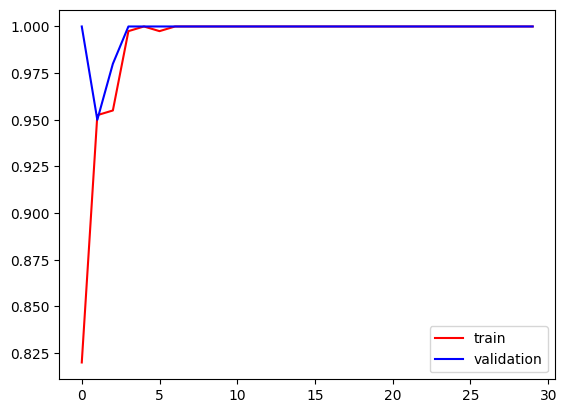

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

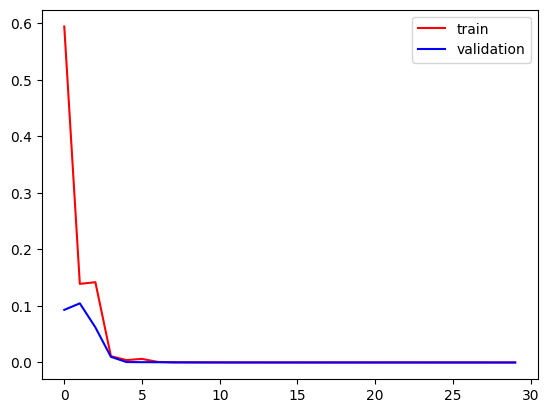

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

16/16 [==============================] - 116s 8s/step
[[1.0000000e+00]
 [3.2743208e-07]
 [5.1754955e-07]
 [6.6627969e-08]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.2544338e-08]
 [1.0000000e+00]
 [3.2257958e-07]
 [9.9999946e-01]
 [1.8776479e-06]
 [1.0000000e+00]
 [3.6764391e-06]
 [1.3970610e-07]
 [9.9999940e-01]
 [1.0000000e+00]
 [9.9994498e-01]
 [1.6756723e-06]
 [1.7822002e-07]
 [2.1944460e-07]
 [1.0000000e+00]
 [8.0393565e-06]
 [9.9999887e-01]
 [9.9999958e-01]
 [4.3800540e-07]
 [2.6716941e-06]
 [9.9999988e-01]
 [8.5458203e-07]
 [6.2755433e-08]
 [3.1856854e-07]
 [9.9999994e-01]
 [1.0000000e+00]
 [8.6284541e-05]
 [3.1518724e-08]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999863e-01]
 [2.8362538e-06]
 [3.1541069e-07]
 [6.3462970e-08]
 [7.2496341e-08]
 [4.0848056e-07]
 [1.0000000e+00]
 [9.3938866e-07]
 [1.0000000e+00]
 [3.0628200e-07]
 [3.4219909e-08]
 [3.7285020e-07]
 [9.9999797e-01]
 [1.0388012e-05]
 [1.7840674e-07]
 [6.3438192e-06]
 [1.7053117e-07]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000

In [13]:
len(predictions)

500

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

#true(true_labels) and expected (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  #threshold is 0.5

#confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[127 123]
 [123 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       250
           1       0.51      0.51      0.51       250

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.51      0.51      0.51       500



In [15]:
#dataset path defined below
train_dir = '/content/drive/MyDrive/Trn'  #Trn 'train' path
test_dir = '/content/drive/MyDrive/Tst'    #Tst 'test' path

In [16]:
import os
print(len(os.listdir('/content/drive/MyDrive/Trn/Pandas')))
print(len(os.listdir('/content/drive/MyDrive/Trn/Bears')))
print(len(os.listdir('/content/drive/MyDrive/Tst/Pandas')))
print(len(os.listdir('/content/drive/MyDrive/Tst/Bears')))

250
250
250
250


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image data generator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# download and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  #binary classification (pandas vs. bears)
    subset='training'  #the training set
)

#Image Data Generator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #same validation split as in the training set
)

# download and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  #the validation set
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [18]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #pre-trained model is ResNet50
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #In ResNet50, the layers are not trainable so the weights are kept as it is. here new layers and I/P.

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 0s 0us/step


In [19]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [20]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary classification

In [21]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
13/13 [==============================] - 161s 12s/step - loss: 2.6789 - accuracy: 0.5575 - val_loss: 0.4741 - val_accuracy: 0.8400
Epoch 2/3
13/13 [==============================] - 138s 11s/step - loss: 0.4091 - accuracy: 0.8500 - val_loss: 0.1874 - val_accuracy: 0.9000
Epoch 3/3
13/13 [==============================] - 154s 12s/step - loss: 0.1434 - accuracy: 0.9450 - val_loss: 0.1319 - val_accuracy: 0.9400


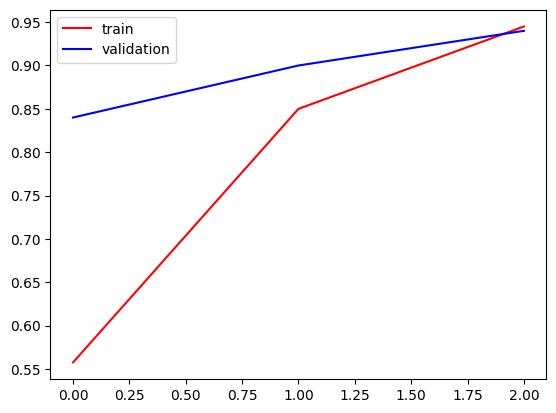

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

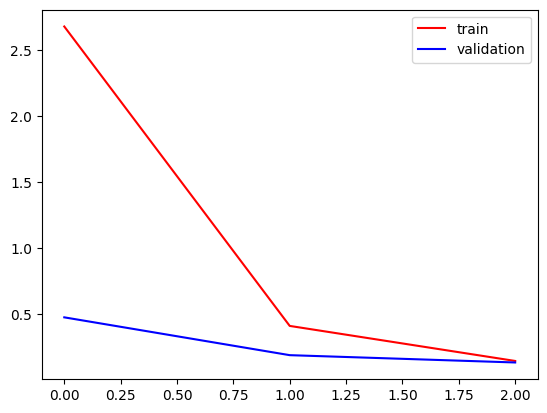

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [25]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

16/16 [==============================] - 27s 2s/step
[[9.9999648e-01]
 [1.0000000e+00]
 [9.9999905e-01]
 [9.9999952e-01]
 [1.0000000e+00]
 [9.9999094e-01]
 [9.7746670e-07]
 [1.0000000e+00]
 [9.9999768e-01]
 [9.9999988e-01]
 [1.0609449e-08]
 [1.0670321e-06]
 [2.5485170e-07]
 [1.0000000e+00]
 [4.6810885e-05]
 [9.9990755e-01]
 [9.9999994e-01]
 [9.5788411e-05]
 [1.0000000e+00]
 [9.9999177e-01]
 [1.3970610e-07]
 [5.9439458e-08]
 [9.9999875e-01]
 [6.6353037e-04]
 [4.0800001e-06]
 [2.1917388e-06]
 [9.9999994e-01]
 [9.9999988e-01]
 [1.0000000e+00]
 [8.3533896e-06]
 [9.9999982e-01]
 [2.2564322e-09]
 [1.0000000e+00]
 [9.9994498e-01]
 [7.7428171e-09]
 [9.9999964e-01]
 [9.9999797e-01]
 [7.6652586e-06]
 [1.0000000e+00]
 [9.0918671e-05]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999940e-01]
 [2.5185184e-07]
 [9.9998963e-01]
 [2.6296991e-07]
 [1.0000000e+00]
 [2.4122402e-08]
 [9.9722307e-08]
 [1.7251567e-07]
 [3.3538683e-07]
 [6.2205130e-05]
 [9.9999928e-01]
 [3.1279532e-07]
 [1.0000000e+00]
 [1.3364264e

In [26]:
len(predictions)

500

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

#true(true_labels) and expected (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  #threshold is 0.5

#confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[131 119]
 [119 131]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       250
           1       0.52      0.52      0.52       250

    accuracy                           0.52       500
   macro avg       0.52      0.52      0.52       500
weighted avg       0.52      0.52      0.52       500

